# Importacion de librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Impotacion DB

In [3]:
import pandas as pd

# Tomo la raw_data del df de diabetes
df_diabetes_url = 'https://raw.githubusercontent.com/Jairosandoval/diabetes_ML/main/diabetes_data.csv'

# Leo el  CSV file usando pandas, especificando la delimitacion que necesito
df_diabetes = pd.read_csv(df_diabetes_url)

print(df_diabetes.shape)
df_diabetes.head()

(1000, 13)


,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


Esto me indica que cuenta con 1.000 valores en 13 columnas.

Ahora hare una pequeña exploracion de tipos de datos, valores nulos etc

In [4]:
print ("valores nulos")
print (df_diabetes.isnull().sum())

valores nulos
user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64


In [5]:
df_diabetes.dtypes

,0
user_id,int64
date,object
weight,float64
height,float64
blood_glucose,float64
physical_activity,float64
diet,int64
medication_adherence,int64
stress_level,int64
sleep_hours,float64


Hallazgos y pròximos cambios:

*   Columna date: Esta como objeto, pasara a formato fecha.

De momnento, voy a ajustar eso, los demàs los veo ok.



In [6]:
#realizo el cambbio de tipo de dato
df_diabetes['date'] = df_diabetes['date'].astype('datetime64[ns]')
#ahora lo compruebo
df_diabetes.dtypes

,0
user_id,int64
date,datetime64[ns]
weight,float64
height,float64
blood_glucose,float64
physical_activity,float64
diet,int64
medication_adherence,int64
stress_level,int64
sleep_hours,float64


In [7]:
df_diabetes.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


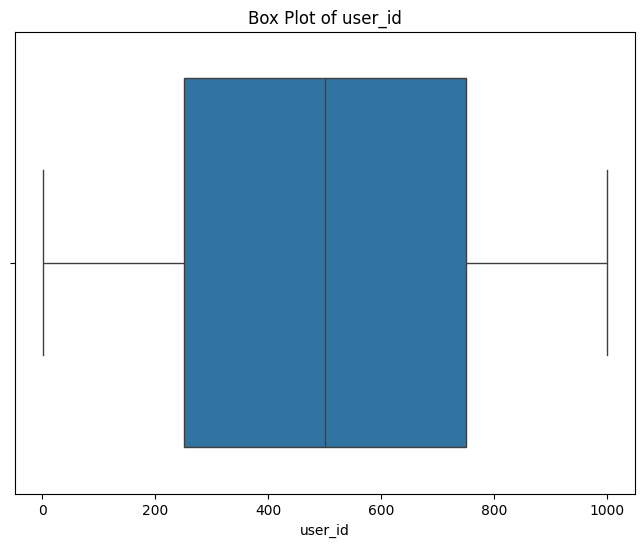

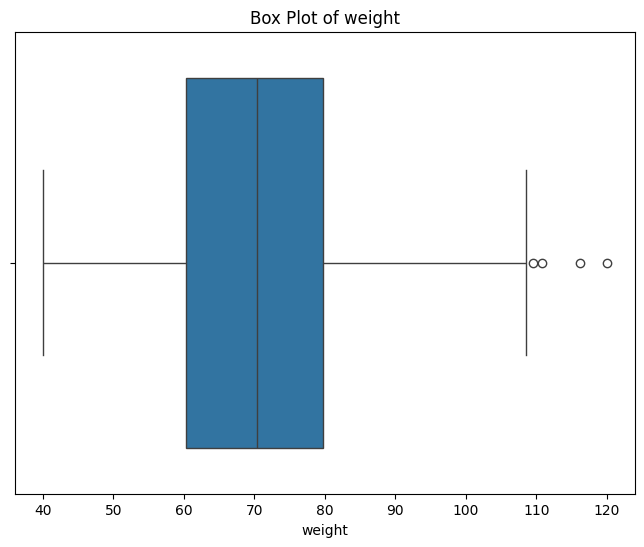

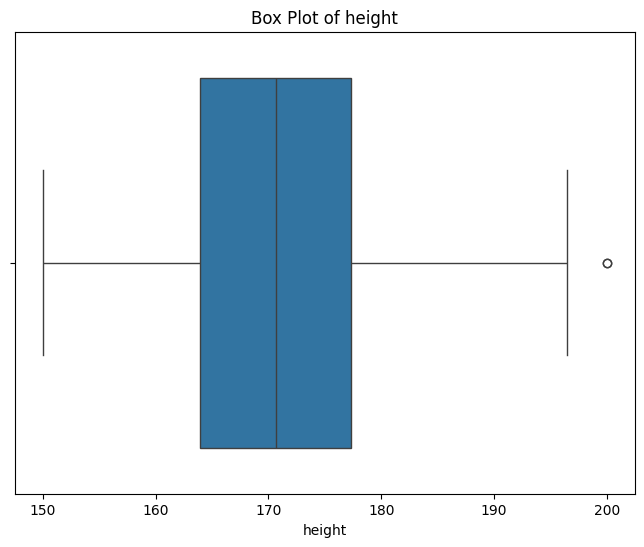

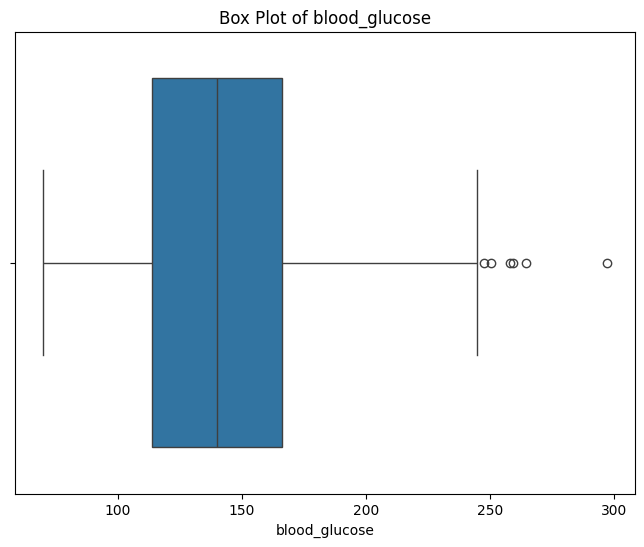

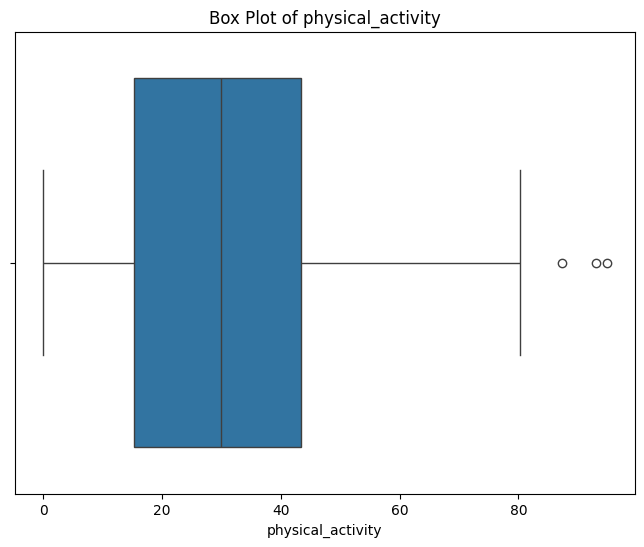

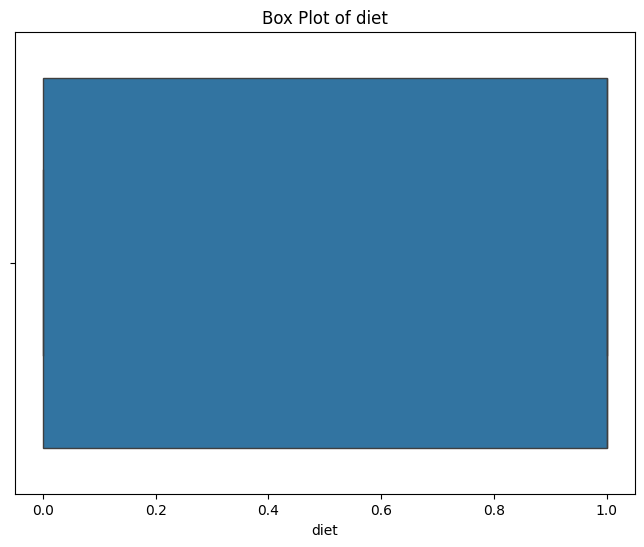

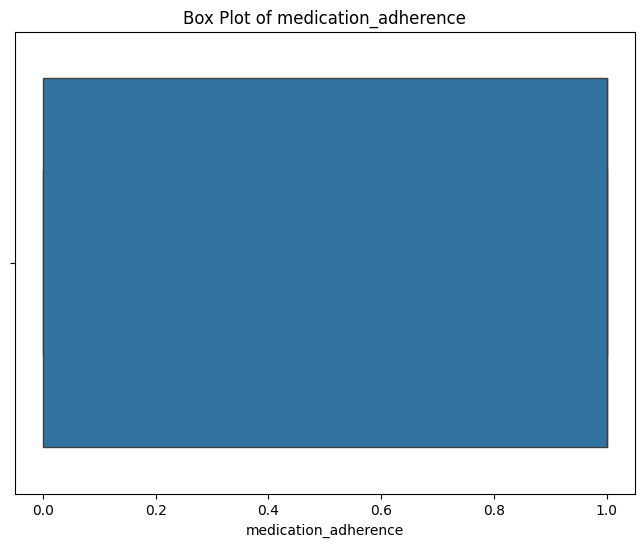

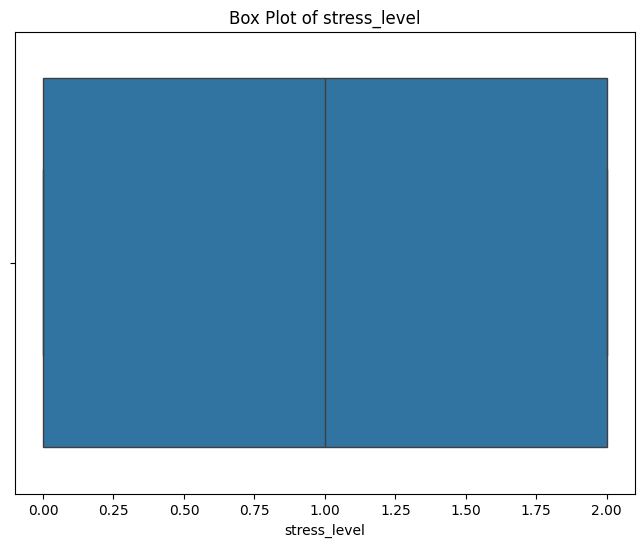

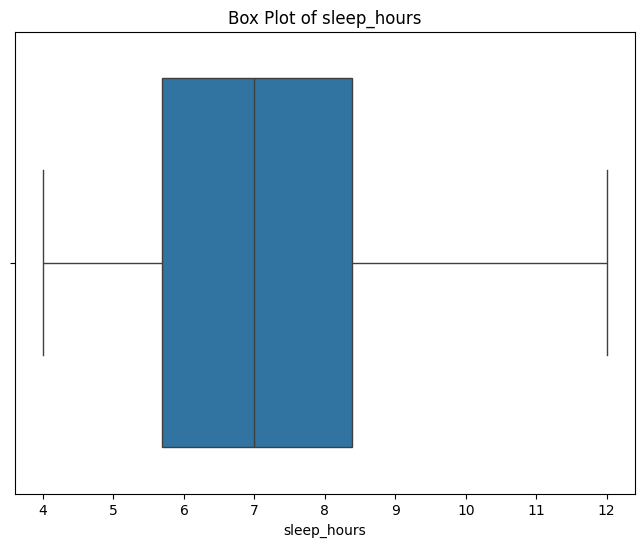

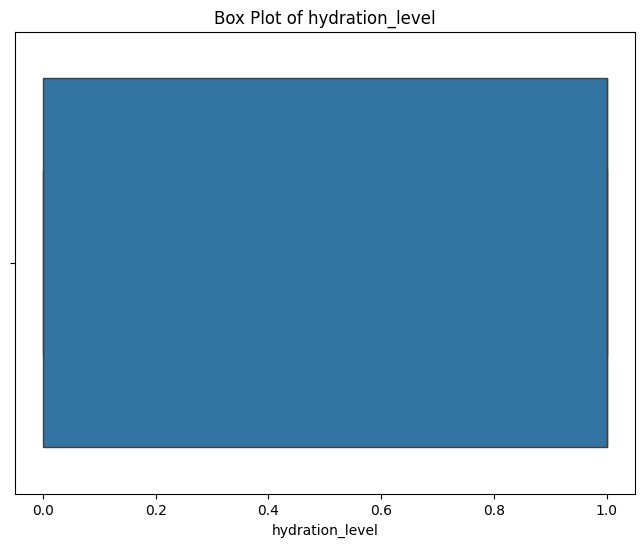

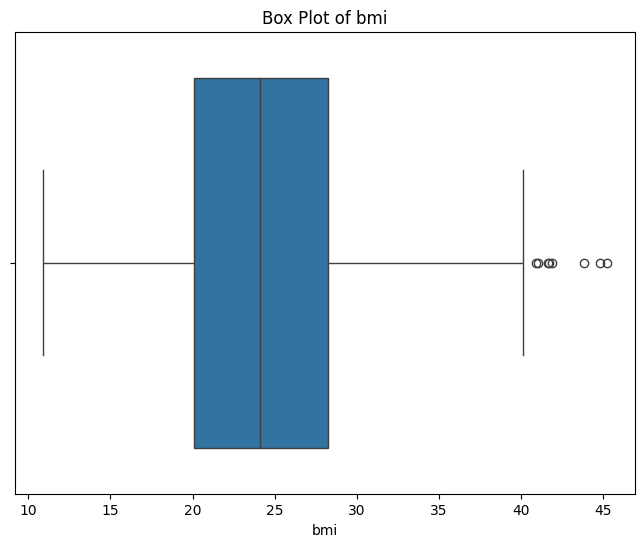

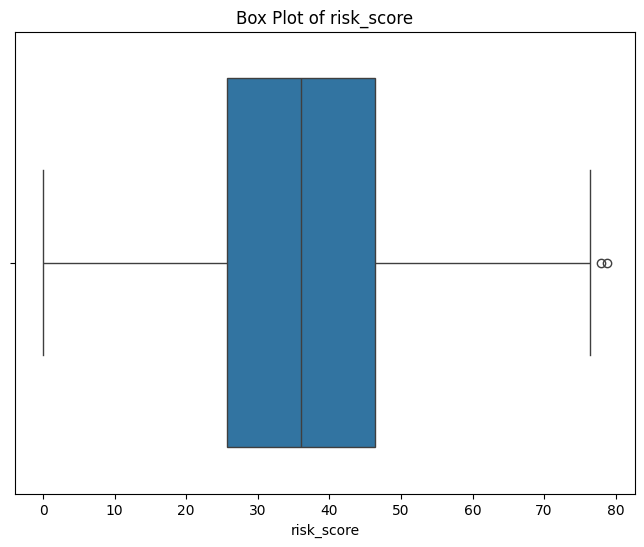

In [8]:
# Creo un  box plot para visualizar o percatarme de posibles outliers de las columnas ( menos user_id y date)
for col in df_diabetes.columns:
    if col not in ['user_ID', 'date']:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df_diabetes[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

Luego de visualizar esto, veo que hay varias columnas que hay que revisar las siguientes columnas con valores inusuales:


*   Weigth: Peso con algunos valores de +100 Kilos ( puede pasar)
*   Heigth: Altura, hay un valor de 2mts aprox, puede pasar igual.
*   Physcical activity: Act fìsica, hay q revisarlo, se ve raro **(OJO)**
*   Blood_glucose: Sangre en glucosa, a revisar**(OJO)**
*   BMI: Indice masa muscular, a revisar **(OJO)**
*   Risk score: A revisar por si acaso. **(OJO)**








In [19]:
df_diabetes.describe()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.361797,170.795375,140.818899,30.294497,0.604000,0.69300,0.950000,7.076312,0.710000,24.385500,36.422120
std,14.467165,9.742934,38.064177,19.305165,0.489309,0.46148,0.833183,1.883829,0.453989,5.872022,14.898022
min,40.000000,150.000000,70.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,10.900000,0.000000
25%,60.286145,163.937583,114.080015,15.251591,0.000000,0.00000,0.000000,5.688762,0.000000,20.100000,25.746352
50%,70.379509,170.630771,139.989969,30.003691,1.000000,1.00000,1.000000,6.998834,1.000000,24.100000,36.086756
75%,79.719158,177.288822,166.436613,43.338908,1.000000,1.00000,2.000000,8.391989,1.000000,28.225000,46.402982
max,120.000000,200.000000,297.049508,94.861859,1.000000,1.00000,2.000000,12.000000,1.000000,45.200000,78.745396


Observando el contexto de cada columna y ententiendo los rangos en que puede estar, vemos los valores normales y que estos outliers no son errores, sino casos que se pueden presentar.

# PCA y clasificacion

**PASO 1: Reprocesamiento**: Voy a normalizar las variables para que PCA y el algoritmo elegido de (K-MEANS) funcione correctamente.

Para ello, voy a eliminar columnas irrelevantes que no aportan info.

In [12]:
from sklearn.preprocessing import StandardScaler

**PASO 2: Selecciono las variables relevantes**

In [21]:
# Seleccionar variables relevantes
features = df_diabetes.drop(columns=["risk_score"])  # Me faltaba esta variable, ya que date y user_id ya estaban eliminadas

**APLICO PCA Para reducir dimensionalidad**

In [23]:
#Reduzco dimensionalidad mantientiendo EL 95 DE VARIANZA

pca = PCA (n_components=0.95) #Busco mantener la varianza ya comentada (95)


X = features # Extraigo las caracteristicas relevantes del PCA
x_pca = pca.fit_transform(X)  # Aplico PCA en las caracteristicas


#Ahora, me fijo en la importancia de cada variable/componente

print ("Varianza explicada por cada componmente:", pca.explained_variance_ratio_) #Corrected attribute name
print ("Componentes principales:", pca.components_) #Corrected attribute name

Varianza explicada por cada componmente: [0.6694351  0.17216826 0.11002102]
Componentes principales: [[ 1.15388458e-02 -2.96169861e-03  9.99749325e-01  1.83124365e-02
  -8.94093314e-05  2.05667113e-04 -1.35647447e-04 -2.17546234e-03
   5.09187283e-04  4.35476066e-03]
 [-1.69175929e-02 -3.69132455e-02 -1.82382279e-02  9.98993316e-01
  -1.19055550e-04  1.71581650e-03 -2.88341254e-04 -1.21801028e-03
   2.78507909e-04  5.13086744e-03]
 [ 9.27866581e-01 -1.15170360e-01 -1.27573784e-02  9.40670993e-03
  -1.08290004e-03  1.62367377e-03 -1.62094176e-03  4.45317635e-03
   9.88522012e-04  3.54289310e-01]]


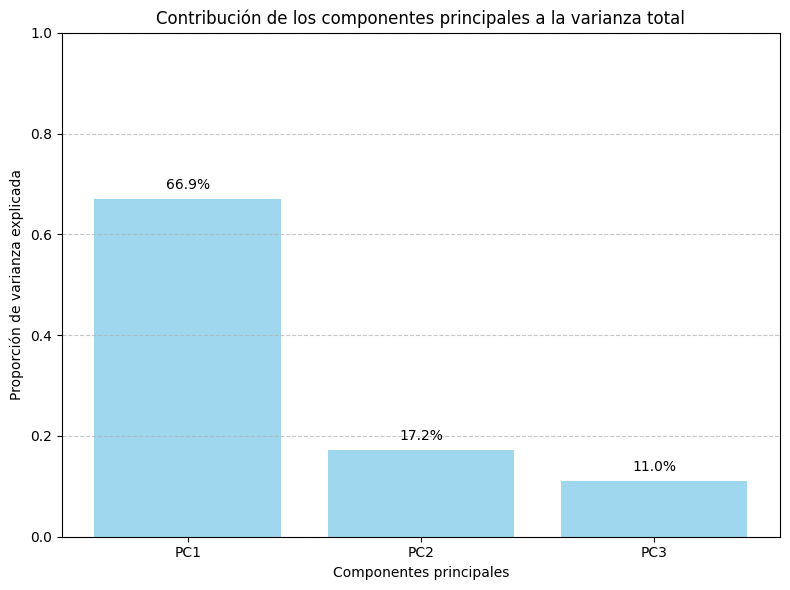

In [29]:
# Varianza explicada por cada componente de PCA
explained_variance = [0.6694351, 0.17216826, 0.11002102]  # Valores del PCA
components = ['PC1', 'PC2', 'PC3']

# Creo gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(components, explained_variance, color='skyblue', alpha=0.8)
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Contribución de los componentes principales a la varianza total')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas de porcentaje
for i, v in enumerate(explained_variance):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**RESULTADO DE PCA**

*   Esto me dice que el **PC1**, abarca el 66,9% de la varianza total.

*   **PC2** cuenta con el 17,2% de la varianza total.


*   **PC3** Abarca el 11% de la varianza total.

Estos 3 abarca el 95% de la variianza, la cual es muy buena para el dataset.








# KMEANS (clasificacion)

Dicho esto, voy a estar trabajando en base a PC1 y PC2.

**PASO 3:Dicho esto, me da para usar el PC1 y PC2 el 84,1%** Para el modelo de K-MEANS**

**Uso PC1 & PC2 como entradas**

In [33]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_selected)

clusters = kmeans.labels_


**ANALIZO LOS CLUSTERS**

In [34]:
df_diabetes["Cluster"] = clusters # Selecciono los clusters
cluster_summary = df_diabetes.groupby("Cluster").mean() #Agrupo los clusters segùn se clasifique.
print(cluster_summary)


            weight      height  blood_glucose  physical_activity      diet  \
Cluster                                                                      
0        71.501922  170.585773     191.334250          26.983151  0.611111   
1        70.287486  170.661719     144.459386          34.434323  0.615556   
2        69.623350  171.140921      98.227724          26.851247  0.582278   

         medication_adherence  stress_level  sleep_hours  hydration_level  \
Cluster                                                                     
0                    0.709402      0.931624     7.112139         0.747863   
1                    0.682222      0.951111     6.985833         0.708889   
2                    0.696203      0.962025     7.178628         0.683544   

               bmi  risk_score  
Cluster                         
0        24.825214   39.413480  
1        24.398667   34.549752  
2        24.041139   36.873347  


En cuanto a

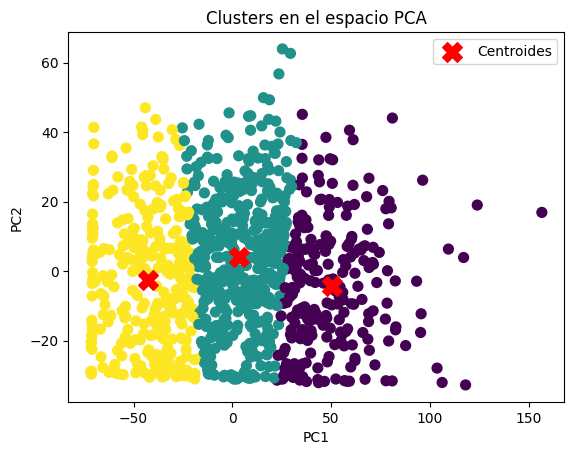

In [35]:


plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters en el espacio PCA')
plt.legend()
plt.show()


In [47]:
# Cluster Analysis: Calculate the mean of each variable for each cluster
# Define numerical_cols to include the relevant columns
numerical_cols = ['weight', 'height', 'physical_activity', 'blood_glucose', 'bmi','diet', 'stress_level', 'sleep_hours',]
cluster_analysis = df_diabetes.groupby('Cluster')[numerical_cols].mean()

# Display the cluster analysis as a DataFrame
print("Cluster Analysis:")
display(cluster_analysis)

Cluster Analysis:


,weight,height,physical_activity,blood_glucose,bmi,diet,stress_level,sleep_hours
Cluster,,,,,,,,
0,71.501922,170.585773,26.983151,191.334250,24.825214,0.611111,0.931624,7.112139
1,70.287486,170.661719,34.434323,144.459386,24.398667,0.615556,0.951111,6.985833
2,69.623350,171.140921,26.851247,98.227724,24.041139,0.582278,0.962025,7.178628


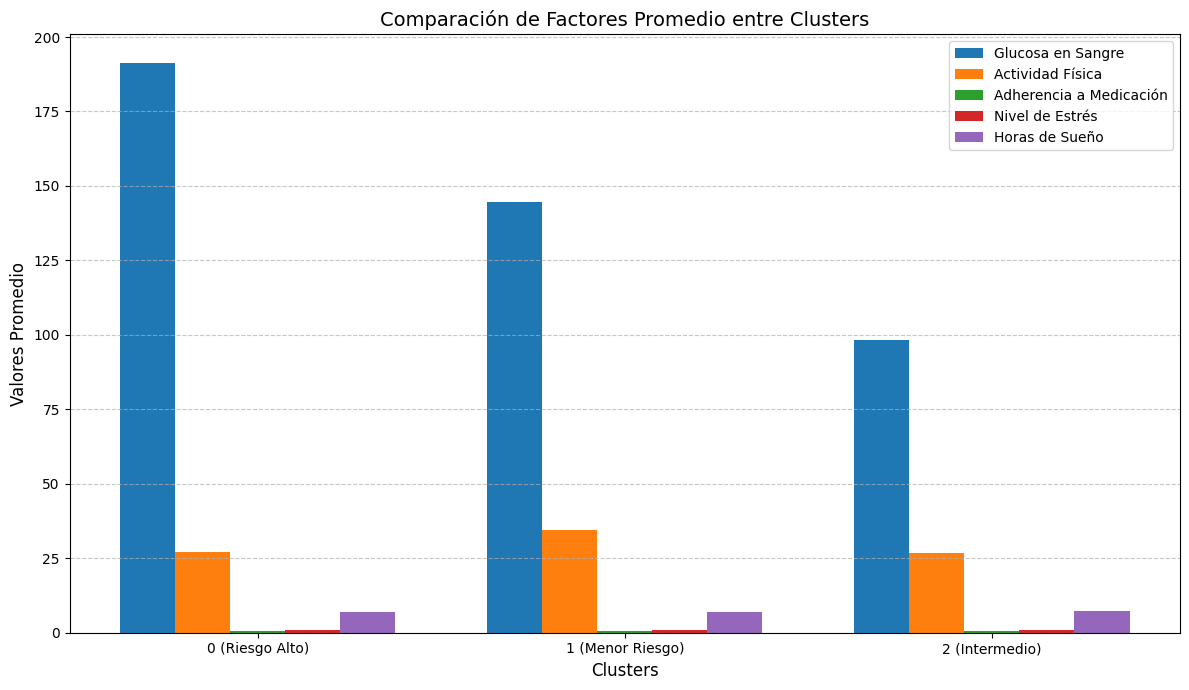

In [50]:
# Datos de las conclusiones para los clusters
cluster_data = {
    'Cluster': ['0 (Riesgo Alto)', '1 (Menor Riesgo)', '2 (Intermedio)'],
    'Glucosa en Sangre': [191.33, 144.46, 98.23],
    'Actividad Física': [26.98, 34.43, 26.85],
    'Adherencia a Medicación': [0.71, 0.68, 0.70],
    'Nivel de Estrés': [0.93, 0.95, 0.96],
    'Horas de Sueño': [7.11, 6.98, 7.18]
}

# Creo un DataFrame para los datos
df_clusters = pd.DataFrame(cluster_data)

# Gráfico de barras comparativo para las métricas
x = np.arange(len(df_clusters['Cluster']))  # posiciones
width = 0.15  # ancho de las barras

fig, ax = plt.subplots(figsize=(12, 7))

# Añado las barras
ax.bar(x - 2*width, df_clusters['Glucosa en Sangre'], width, label='Glucosa en Sangre')
ax.bar(x - width, df_clusters['Actividad Física'], width, label='Actividad Física')
ax.bar(x, df_clusters['Adherencia a Medicación'], width, label='Adherencia a Medicación')
ax.bar(x + width, df_clusters['Nivel de Estrés'], width, label='Nivel de Estrés')
ax.bar(x + 2*width, df_clusters['Horas de Sueño'], width, label='Horas de Sueño')

# Configuro las etiquetas y el diseño
ax.set_xlabel('Clusters', fontsize=12)
ax.set_ylabel('Valores Promedio', fontsize=12)
ax.set_title('Comparación de Factores Promedio entre Clusters', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_clusters['Cluster'], fontsize=10)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**CONCLUSIONES**

*   **El grupo 0 (riesgo alto)** Vemos que a pesar de tener mayor peso promedio similar a los demàs, se caracteriza con un valor muy alto al resto en glucosa en sangre y de ser el segundo lugar de tener actividad fìsica. Por otro lado el estress no se ve que necesariamente deba ser alto para que se incline por diabetes.

En resumen, este grupo tiene un muy alto nivel por encima de los demas de azucar en la sangre, aunque otros factors como el estres o sueño no parecen difernciarse mucho


*   **Las personas de grupo 1 (menor riesgo)** Suelen ser personas que tienen mayor actividad fisica que todos, duermen menos adeherencia a la medicacion y no necesariamente tienen mayor glucosa en la sangre.


Este grupo dice que gracias a su actividad fisica alta, logran mantener un nivel de riesgo bajo, incluso si los demas valores no son ideales.


**Conclusion general** La glucosa en sangre y actividad fisica son valores usper criticos, si se tiene un alto valor de glucosa en sangre, para tener indice bajo debe tener una actividad fisica agresiva.

Ahora, el estres, adherencia a medicamentos son secundarios, importantes pero no muy relevantes.